# Sezione 2: Il DataSet
## (lezioni 11 - 18)

# Analisi di un dataseta con Pandas


In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/ProfAI/ml00/master/2%20-%20Datasets%20e%20data%20preprocessing/data/iris.csv"


In [3]:
iris = pd.read_csv(url)

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


i nomi delle features sono stati riconosciuti automaticamente, se non lo fa si possono aggiungere manualmente

In [6]:
iris.columns## ci da i nomi delle features

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
iris.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


possiamo accedere ai valori di una singola colonna usando la sua chiave

In [8]:
Y = iris['species']
Y.head()


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

in questo caso Y non è un dataframe ma un' altra struttura dati chiamata series.
una series corrisponde piu o meno ad un array monodimensionale e un dataframe è composto da diverse colonne di queste series


In [9]:
type(Y)

pandas.core.series.Series

In [10]:
X = iris[["sepal_length","sepal_width","petal_length","petal_width"]]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


in questo caso essendoci piu colonne, X corrisponde a un dataframe.
si poteva ottenere lo stesso risultato con:

In [11]:
X = iris.drop("species",axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


il parametro axis compare in tutte le funzioni che lavprano per righe (axis=1) o per colonne(axis=0)


#### slicing del dataset:

selezionare solo alcune righe o colonne di un dataset abbiamo due soluzioni diverse: Lock o Ilock
la differenza è che loc lavora sui label e ilock sugli indici


In [12]:
iris_sampled = iris.copy()
iris_sampled = iris.sample(frac=1)
iris_sampled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
49,5.0,3.3,1.4,0.2,setosa
19,5.1,3.8,1.5,0.3,setosa
41,4.5,2.3,1.3,0.3,setosa
128,6.4,2.8,5.6,2.1,virginica


come si puo vedere dagli indici il dataset è stato mescolato

In [13]:
iris_sampled.iloc[3]

sepal_length       4.5
sepal_width        2.3
petal_length       1.3
petal_width        0.3
species         setosa
Name: 41, dtype: object

abbiamo ottenuto il quarto elemento del dataset iris_sampled ( che corrisponde al label 127)
Per ottenere lo stesso risultato con iloc dobbiamo mettere il label della riga che vogliamo ottenere, ovvero 127:

In [14]:
iris_sampled.loc[127]

sepal_length          6.1
sepal_width             3
petal_length          4.9
petal_width           1.8
species         virginica
Name: 127, dtype: object

si puo fare una selezione sia per righe che per colonne, specificando il nome della colonna e l'indice della riga  

In [15]:
iris_sampled.loc[127,'species']
# cosi abbiamo selezionato la colonna 'species' della riga il cui indice è 127 

'virginica'

In [16]:
iris_sampled.iloc[:10,1]
## cosi abbiamo selezionato le prime 10 righe della seconda colonna

148    3.4
49     3.3
19     3.8
41     2.3
128    2.8
43     3.5
83     2.7
50     3.2
143    3.2
107    2.9
Name: sepal_width, dtype: float64

ora vediamo come ottenere una serie di informazioni statistice sul nostro dataframe


In [17]:
iris.shape
# ci da le dimensioni del dataframe: 150 righe e 5 colonne, ovvero 150 osservazioni e 5 features

(150, 5)

In [18]:
iris.describe()
# ci da informazioni statistiche: numero di valori presenti, valore medio, max, min, dev stad...per ogni colonna
#si possono anche usare funzioni come.max(), min(), ecc. per ottenere e singolo informaioni per colonna

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
iris.max()
# ci da il valore massimo di ogni colonna...

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [20]:
iris['sepal_length'].var()
# ci restituisce la varianza della colonna sepal_length del dataset iris

0.6856935123042505

se abbiamo a che fare con variabili categoriche che corrispondono all'apparteneza ad una classe, in quest caso abbiamo la colonna species,  e vogliamo visualizzare quali sono, possiamo usare la funzione .unique():


In [21]:
iris['species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

funzionalita molto utile dei dataframe è la possibilita di creare dei filtri applicando delle maschere:
vogliamo creare una maschera in grado si selezionare solo le osservazioni che hanno la lunghezza del petalo maggiore della lunghezza media 

In [22]:
long_petal_mask = iris["petal_length"] > iris["petal_length"].mean()
long_petal_mask

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: petal_length, Length: 150, dtype: bool

per applicare la maschera basta usarla come fosse un indice:
    

In [23]:
iris_long_petal = iris[long_petal_mask]
iris_long_petal.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


sono state scartate le osservazioni con lunghezza dei petali minori del valoer medio

vogliamo una maschera che ci permetta di cambiare la species da setosa a undefined:
prima di tutto creiamo una copia del dataframe per evitare di cambiare l 'originale

In [24]:
iris_copy = iris.copy()
iris_copy[iris_copy["species"] == "setosa"] = "undefined"
iris_copy["species"].unique()

array(['undefined', 'versicolor', 'virginica'], dtype=object)

operazioni aritmetiche del dataframe:
proviamo a fare una normalizzazione delle celle numeriche. prima di tutto eliminiamo la feature species che non è numerica


In [25]:
X = iris.drop("species",axis=1)
X_norm = (X-X.min())/(X.max()-X.min())
X_norm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


la normalizzazione è stata eseguita su tutte le colonne, senza farla colonna per colonna, ma operando direttamente su tutto il dataframe

un altro metodo utile è il sort values che ci permette di ordinare il nostro dataframe in base ai valori contenuti in una colonna:


In [26]:
 iris.sort_values("petal_length").head()

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa


con il group_by possimao raggruppare le informazioni del nostro dataset in base a delle condizioni, ad esempio proviamo a farlo con le specie

In [27]:
grouped_species = iris.groupby("species")
grouped_species.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [28]:
grouped_species

Applicare funzioni su righe o colonne, per farlo si usa il metodo .apply, il cui primo argomento è la funzione da applicare.

In [29]:
import numpy as np

In [30]:
iris.apply(np.count_nonzero, axis=1).head()
# così contiamo i valori diversi da zero per ogni riga. il risultato sara una series

0    5
1    5
2    5
3    5
4    5
dtype: int64

In [31]:
# se lo volessimo fare per colonne, dovremmo mettere axis = 0
iris.apply(np.count_nonzero, axis=0).head()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

possimao anche applicare una funzione valore per valore usando il metodo .applymap
proviamo ad arrotondare tutti i valori del dataframe all'intero piu vicino

la funzione lambda è una funzione usa e getta che viene definita per essere utilizzata una sola volta(quindi poi non rimane in memoria?!)

In [32]:
X = iris.drop("species", axis = 1)
X = X.applymap(lambda val:int(round(val,0)))
X.head()
# il risultato è un dataframe come quello di partenza, ma con valori arrotondati

,sepal_length,sepal_width,petal_length,petal_width
0,5,4,1,0
1,5,3,1,0
2,5,3,1,0
3,5,3,2,0
4,5,4,1,0


un problema comune è avevre un dataset con valori non validi.
il npstro dataset ha tutti valori validi, quindi per prima cosa nadiamo a creare dei valori nn validi

In [33]:
iris_nan = iris.copy()

In [34]:
samples = np.random.randint(iris.shape[0],size=(10))
# creiamo un di vettore di 10 valori casuali che fungeranno da indici di quelle osservazioni da andare a sporcare

In [35]:
#usiamo loc per modificare in None la features collegata alla lunghezza del petalo di queste 10 osservazioni.
iris_nan.loc[samples,"petal_length"] = None
#ora contiamo il numero di valori invalidi all-interno della colonna petal_length...sono 10 come ci si aspettava...
iris_nan["petal_length"].isnull().sum()

10

In [36]:
# ora possiamo iniziare ad applicare fillna
#sostituiamo i valori invalidi con il valore medio della lunghezza del petalo.
mean_petal_length = iris_nan["petal_length"].mean()
iris_nan["petal_length"].fillna(mean_petal_length)
#eseguendo questa funzione cosme è scritta sopra verrà restituita una nuova series,
#e non viene modificato il dataframe di partenza. Per farlo bisogna eseguire una assegnazione,
#oppure usare il parametro inplace:
iris_nan["petal_length"].fillna(mean_petal_length, inplace = True)

ora contiamo di nuovo i valori nulli e verifichiamo che siano zero

In [37]:
iris_nan["petal_length"].isnull().sum()

0

un altra funzionalita utile di pandas è la possibilita di interfacciarsi con matplotlib per usare grafici e visualizzazioni


In [38]:
import matplotlib.pyplot as plt

facciamo un grafico per visualizzare la relazion efra lunghezza e larghezza del petalo

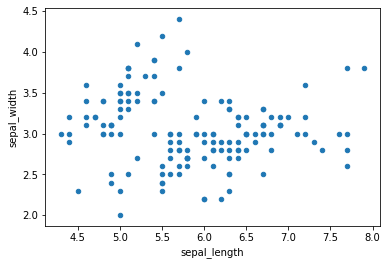

In [39]:
iris.plot(x='sepal_length', y='sepal_width', kind='scatter')

# Tipi di dati

COME TRASFORMARE I TIPI DI DATI PER RENDERLI UN BUON INPUT PER UN ALGORITMO DI APPRENDIMENTO

tipi di dati: 
 - quantitativa continua (dati numerici)
 - qualitativa ordinata (dati categorici, ordinali) sono dette variabili ordinali
 - qualitativa sconnessa (dati categorici nominali) sono dette variabili nominali

è possibile fornire ad un modello di machne learning solamente numeri, quondi è necessario odificare le variabili odinali in numeri. Vediamo come:


stiamo usando come esempio il dataset relativo alle maglie vendute in un negozio di abbigliamoento. le feature sono il prezzo( variabile quantitativa continua), la taglia (variabile ordinale) e il colore ( variabile nominale).
Vogliamo traformare la taglia in un numero ( da S,M,L,XL ecc a 1, 2, 3, 4 ...) ovvero trasformare le variabili ordinali in numeriche:


dobbiamo far corrispondere ad ogni label un numero che corrisponde al suo ordine. 

la soluzione da usare con le variabili sconnesse è il One-hot encoding.
consiste nel sostituire la feature con una nuova feature per ogni label (quindi se le label del colore sono 3: rosso, bianco o verde, avro 3 nuove feature, un aper ogni label e non avro piu la feature 'Colore',
e rappresentare l'appartenenza o meno alla classe rappresentata dal lable con una variabile booleana.
Questo tipo di variabili, che possono assumere solo valore vero o falso, ovvero 0 e 1, fungono da indicatori e vengono chimate 'dummies variables' ('variabili di comodo'). 

In questa maniera avremo un dataset tutto numerico, adatto ad un algoritmo di apprendimento di machine learning.


# Label encoding e one-hot encoding


carichiamo il dataset di esempio all'interno di un dataframe

In [40]:
url2 = "https://raw.githubusercontent.com/ProfAI/ml00/master/2%20-%20Datasets%20e%20data%20preprocessing/data/shirts.csv"

shirts = pd.read_csv(url2)
shirts.head()

,Unnamed: 0,taglia,colore,prezzo
0,0,S,bianco,4.99
1,1,M,bianco,19.99
2,2,XL,bianco,12.49
3,3,XL,bianco,14.99
4,4,S,bianco,14.99


In [41]:
#prima di procedere creiamo anche un array numpy contenete il dataset: usiamo la proprieta values del dataframe
X = shirts.values
X[:10]

array([[0, 'S', 'bianco', 4.99],
       [1, 'M', 'bianco', 19.99],
       [2, 'XL', 'bianco', 12.49],
       [3, 'XL', 'bianco', 14.99],
       [4, 'S', 'bianco', 14.99],
       [5, 'S', 'verde', 7.99],
       [6, 'M', 'verde', 4.99],
       [7, 'L', 'verde', 12.49],
       [8, 'XL', 'bianco', 12.49],
       [9, 'M', 'verde', 19.99]], dtype=object)

taglia e colore sono rappresentate da label, e appartengono alla tipologia dei dati categorici, in particolare la taglia è una variabile ordinale, quindi è possibile definire una relazione di ordine dei vari label, e il colore una variabile nominale.
Vogliamo rasformare queste variabili in variabili numeriche.

partiamo dalla taglia:

In [42]:
size_mapping = {"S":0, "M":1, "L":2, "XL":3}

possiamo usare il metodo .map per sostituire i valori di un dataframe :


In [43]:
shirts["taglia"] = shirts["taglia"].map(size_mapping)


In [44]:
shirts.head()

,Unnamed: 0,taglia,colore,prezzo
0,0,0,bianco,4.99
1,1,1,bianco,19.99
2,2,3,bianco,12.49
3,3,3,bianco,14.99
4,4,0,bianco,14.99


se il nostro dataset è un array in numpy e non vogliamo usare pandas, dobbiamo creare la nostra propria funzione map, e possiamo servirci del metodo .vectorize. All'interno di vectorize creiamo la nostra personale funzione map usando la funzione lambda, che è una funzione usa e getta.

In [45]:
#fmap = np.vectorize(lambda t:size_mapping[t])

In [46]:
#X[:,0] = fmap(X[:,0])
#X[:5]

ora applichiamo il One-hot encoder alla variabile nominale, ovvero il colore.

con pandas si puo usare semplicemente il metodo .getdummies:

In [47]:
shirts = pd.get_dummies(shirts, columns = ["colore"])
shirts.head()

,Unnamed: 0,taglia,prezzo,colore_bianco,colore_rosso,colore_verde
0,0,0,4.99,1,0,0
1,1,1,19.99,1,0,0
2,2,3,12.49,1,0,0
3,3,3,14.99,1,0,0
4,4,0,14.99,1,0,0


la clonna colore è stata sostituita da 3 nuove colonne: un aper ogni colore. Queste variabili si chiamano variabili di comodo, o dummies variables.

Per farlo con numpy...

# Gestire i dati mancanti

carichiamo il dataset iris_nan:

In [49]:
url3 = "https://raw.githubusercontent.com/ProfAI/ml00/master/2%20-%20Datasets%20e%20data%20preprocessing/data/iris_nan.csv"
iris_nan = pd.read_csv(url3)
iris_nan.head()


,Unnamed: 0,index,sepal_length,sepal_width,petal_length,petal_width,class
0,0,103,6.3,2.9,5.6,1.8,Iris-virginica
1,1,129,7.2,3.0,5.8,1.6,Iris-virginica
2,2,20,5.4,3.4,NaN,0.2,Iris-setosa
3,3,112,6.8,3.0,5.5,2.1,Iris-virginica
4,4,111,6.4,2.7,5.3,1.9,Iris-virginica


In [52]:
#creaimo gli array numpy collegati agli array e le features:

Y = iris_nan["class"].values
X = iris_nan.drop("class", axis=1).values

In [53]:
iris_nan

,Unnamed: 0,index,sepal_length,sepal_width,petal_length,petal_width,class
0,0,103,6.3,2.9,5.6,1.8,Iris-virginica
1,1,129,7.2,3.0,5.8,1.6,Iris-virginica
2,2,20,5.4,3.4,NaN,0.2,Iris-setosa
3,3,112,6.8,3.0,5.5,2.1,Iris-virginica
4,4,111,6.4,2.7,5.3,1.9,Iris-virginica
5,5,121,5.6,2.8,4.9,2.0,Iris-virginica
6,6,25,5.0,3.0,1.6,0.2,Iris-setosa
7,7,149,5.9,3.0,5.1,1.8,Iris-virginica
8,8,139,6.9,3.1,5.4,2.1,Iris-virginica
9,9,96,5.7,2.9,4.2,1.3,Iris-versicolor


alcune osservazioni hanno dati mancanti (NaN)
vediamo come gestire questi dati mancanti:
il primo metodo consiste nel rimuovere le righe o le colonne che contengono dati mancanti, con il metodo .dropna():


In [59]:
iris_drop = iris_nan.dropna()
iris_drop
#in questo modo rimuove le righe conteneti dati mancanti. 

,Unnamed: 0,index,sepal_length,sepal_width,petal_length,petal_width,class
0,0,103,6.3,2.9,5.6,1.8,Iris-virginica
1,1,129,7.2,3.0,5.8,1.6,Iris-virginica
3,3,112,6.8,3.0,5.5,2.1,Iris-virginica
4,4,111,6.4,2.7,5.3,1.9,Iris-virginica
5,5,121,5.6,2.8,4.9,2.0,Iris-virginica
6,6,25,5.0,3.0,1.6,0.2,Iris-setosa
7,7,149,5.9,3.0,5.1,1.8,Iris-virginica
8,8,139,6.9,3.1,5.4,2.1,Iris-virginica
9,9,96,5.7,2.9,4.2,1.3,Iris-versicolor
10,10,130,7.4,2.8,6.1,1.9,Iris-virginica


In [60]:
#Per rimuovere le coonne si usa sempre .dropna(axis = 1):
iris_drop = iris_nan.dropna(axis=1)
iris_drop
# in questo modo vengono rimosse tutte le colonne contenenti almeno un dato mancante

,Unnamed: 0,index,sepal_length,sepal_width,petal_width,class
0,0,103,6.3,2.9,1.8,Iris-virginica
1,1,129,7.2,3.0,1.6,Iris-virginica
2,2,20,5.4,3.4,0.2,Iris-setosa
3,3,112,6.8,3.0,2.1,Iris-virginica
4,4,111,6.4,2.7,1.9,Iris-virginica
5,5,121,5.6,2.8,2.0,Iris-virginica
6,6,25,5.0,3.0,0.2,Iris-setosa
7,7,149,5.9,3.0,1.8,Iris-virginica
8,8,139,6.9,3.1,2.1,Iris-virginica
9,9,96,5.7,2.9,1.3,Iris-versicolor


Questo metodo è sconsigliato perche perdiamo molte informazioni, quindi va usato solo in casi estremi
una soluzione migliore è l'IMPUTAZIONE dei dati mancanti, ad esempio con la media:
calcolimao la media e poi usiamo il metodo .fillna():

In [63]:
replace_with = iris_nan.mean()
replace_with

Unnamed: 0      14.500000
index           81.500000
sepal_length     6.046667
sepal_width      3.016667
petal_length     4.414815
petal_width      1.326667
dtype: float64

In [64]:
iris_imp = iris_nan.fillna(replace_with)
iris_imp

,Unnamed: 0,index,sepal_length,sepal_width,petal_length,petal_width,class
0,0,103,6.3,2.9,5.600000,1.8,Iris-virginica
1,1,129,7.2,3.0,5.800000,1.6,Iris-virginica
2,2,20,5.4,3.4,4.414815,0.2,Iris-setosa
3,3,112,6.8,3.0,5.500000,2.1,Iris-virginica
4,4,111,6.4,2.7,5.300000,1.9,Iris-virginica
5,5,121,5.6,2.8,4.900000,2.0,Iris-virginica
6,6,25,5.0,3.0,1.600000,0.2,Iris-setosa
7,7,149,5.9,3.0,5.100000,1.8,Iris-virginica
8,8,139,6.9,3.1,5.400000,2.1,Iris-virginica
9,9,96,5.7,2.9,4.200000,1.3,Iris-versicolor


Ha sosttuito i dati mancanti con il valore medio relativo alla feature mancante
Lo stesso si potrebbe fare con la mediana e con la moda

ma siccome con la moda resituisce un dataframe degli elementi ordinati, bisogna selezionare soltanto i primi valori:

In [68]:
replace_with = iris_nan.dropna().mode().iloc[0]
replace_with
iris_imp = iris_nan.fillna(replace_with)
iris_imp

,Unnamed: 0,index,sepal_length,sepal_width,petal_length,petal_width,class
0,0,103,6.3,2.9,5.6,1.8,Iris-virginica
1,1,129,7.2,3.0,5.8,1.6,Iris-virginica
2,2,20,5.4,3.4,5.0,0.2,Iris-setosa
3,3,112,6.8,3.0,5.5,2.1,Iris-virginica
4,4,111,6.4,2.7,5.3,1.9,Iris-virginica
5,5,121,5.6,2.8,4.9,2.0,Iris-virginica
6,6,25,5.0,3.0,1.6,0.2,Iris-setosa
7,7,149,5.9,3.0,5.1,1.8,Iris-virginica
8,8,139,6.9,3.1,5.4,2.1,Iris-virginica
9,9,96,5.7,2.9,4.2,1.3,Iris-versicolor


Lo stesso si puo fare con un array numpy invece di pandas, usando la classe di Scikit Imputer...

In [73]:
from sklearn.preprocessing import Imputer

In [74]:
imp = Imputer(strategy = "mean", axis = 0, missing_values = "NaN")
X_imp = imp.fit_transform(X)
X_imp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[  0.        , 103.        ,   6.3       ,   2.9       ,
          5.6       ,   1.8       ],
       [  1.        , 129.        ,   7.2       ,   3.        ,
          5.8       ,   1.6       ],
       [  2.        ,  20.        ,   5.4       ,   3.4       ,
          4.41481481,   0.2       ],
       [  3.        , 112.        ,   6.8       ,   3.        ,
          5.5       ,   2.1       ],
       [  4.        , 111.        ,   6.4       ,   2.7       ,
          5.3       ,   1.9       ],
       [  5.        , 121.        ,   5.6       ,   2.8       ,
          4.9       ,   2.        ],
       [  6.        ,  25.        ,   5.        ,   3.        ,
          1.6       ,   0.2       ],
       [  7.        , 149.        ,   5.9       ,   3.        ,
          5.1       ,   1.8       ],
       [  8.        , 139.        ,   6.9       ,   3.1       ,
          5.4       ,   2.1       ],
       [  9.        ,  96.        ,   5.7       ,   2.9       ,
          4.2       ,   1.3

In [75]:
# si puo cambiare la strategia con "median" o con "most_frequent"

# Portare il dataset sulla stessa scala: normalizzazione e standardizzazione dei dati

Portare il dataset sulla stessa scala è necessario se si vuole usare il dataset in alcuni algoritmi di machine learning:
è sempre buona norma farlo durante il preprocessing.
Vediamo 2 metodi: Normalizzazione e Standardizzazione:
#### normalizzazione:
ci sonsente di portare i dati di tutte le colonne in un range compreso fra 0 e 1, applicando una semplice forma(in realta ci sono vari metodi di normalizzazione):
Dato un vettore qualsiasi contenente n elementi, la normalizzazione si esegue prendendo ogni valore in esso contenuto, sottraendo il valore minimo e dividendo per la differenza fra il valore massimo e il valore minimo. Questo va fatto per ogni dato del dataset.

#### Standardizzazione:
Permette di trasformare il dataset in una distribuzione normale, ovvero in una distribuzione di valori con media centrata in 0 
e deviazione standard uguale a 1:
avendo un vettore di n elementi, si sottrae ad ogni elemento il valore medio del vettore e dividendo per la deviazione standard. Per standardizzare il dataset, come per la normalizzazione, è necessario applicare la formula ad ogni vettore colonna del dataset.

###### Quale metodo conviene utilizzare?
Dipende...
La standardizzazione conserva le informazioni riguardanti gli outlayers, ma per alcuni tipi di modelli o datasetconviene mantenere i dati in un range di valori positivi...


# Normalizzazione e standardizzazione di un dataset con pandas



In [77]:
#usiamo il dataset wines:

wines = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", names=['class','alcol','flavonoidi'], 
                    usecols=[0,1,7])
wines.head()
#abbiamo caricato il file direttamente da url, poi abbiamo selezionato le colonne da utilizzare 
#e gli abbiamo assegnati i nomi

,class,alcol,flavonoidi
0,1,14.23,3.06
1,1,13.20,2.76
2,1,13.16,3.24
3,1,14.37,3.49
4,1,13.24,2.69


In [85]:
#creiamo anche due array numpy collegati al nostro dataframe: uno corrispondente alle feature e uno alla classe:

Y = wines["class"].values
X = wines.drop("class", axis=1).values
wines.head(10)

,class,alcol,flavonoidi
0,1,14.23,3.06
1,1,13.20,2.76
2,1,13.16,3.24
3,1,14.37,3.49
4,1,13.24,2.69
5,1,14.20,3.39
6,1,14.39,2.52
7,1,14.06,2.51
8,1,14.83,2.98
9,1,13.86,3.15


In [86]:
wines.describe()

,class,alcol,flavonoidi
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.029270
std,0.775035,0.811827,0.998859
min,1.000000,11.030000,0.340000
25%,1.000000,12.362500,1.205000
50%,2.000000,13.050000,2.135000
75%,3.000000,13.677500,2.875000
max,3.000000,14.830000,5.080000


In [87]:
# i flavonoidi sono in un range di valori diverso dall'alcol. Dobbiamo normalizzare o standardizzare.


Pandas non ha un metodo per la normalizzazione, ma possiamo implementarlo noi scrivendo la formula:
per prima cosa creiamo una copia del dataframe per non modificare l'originale. Poi creiamo un array contenente le colonne da normalizzare:


In [88]:
wines_norm = wines.copy()
features = ["alcol", "flavonoidi"]
to_norm = wines[features]

wines_norm[features] = (to_norm - to_norm.min())/(to_norm.max()-to_norm.min())
wines_norm.head(10)

,class,alcol,flavonoidi
0,1,0.842105,0.573840
1,1,0.571053,0.510549
2,1,0.560526,0.611814
3,1,0.878947,0.664557
4,1,0.581579,0.495781
5,1,0.834211,0.643460
6,1,0.884211,0.459916
7,1,0.797368,0.457806
8,1,1.000000,0.556962
9,1,0.744737,0.592827


features identifica le colonne(le features) da normalizzare,
to norm seleziona solo le colonne da normalizzare del dataframe, creando una sorta di sotto-dataframe,
e poi con wines_norm [features]=... si vanno a fare le sostituzioni di ogni valore con il valore normalizzato secondo la formula implementata

Per normalizzare un array numpy possiamo usare SciKitLearn, che a differenza di pandas ha una classe che serve apposta per la normalizzazione. Si chiama MinMaxScaler.

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
#ora creiamo un istanza, creiamo un acopia dell'array, e poi possiamo applicare la normalizzazione

mms = MinMaxScaler()
X_norm = X.copy()

X_norm = mms.fit_transform(X_norm)
X_norm[:5]

# il risultato è analogo a quello di prima

array([[0.84210526, 0.57383966],
       [0.57105263, 0.51054852],
       [0.56052632, 0.61181435],
       [0.87894737, 0.66455696],
       [0.58157895, 0.49578059]])

Ora vediamo come eseguire la standardizzazione:
con Pandas dobbiamo procedere come per la normalizzazione:
        

In [97]:
wines_std = wines.copy()
to_std = wines_std[features]
wines_std[features] = (to_std - to_std.mean())/(to_std.std())
wines_std.head()

,class,alcol,flavonoidi
0,1,1.514341,1.031908
1,1,0.245597,0.731565
2,1,0.196325,1.212114
3,1,1.686791,1.462399
4,1,0.294868,0.661485


In [99]:
#Con Numpy, come prima, abbiamo a disposizione una classe apposita, che si chiama StandardScaler:

from sklearn.preprocessing import StandardScaler
    

In [100]:
X_std = X.copy()
ss = StandardScaler()
X_std = ss.fit_transform(X_std)
X_std[:5]

array([[1.51861254, 1.03481896],
       [0.24628963, 0.73362894],
       [0.19687903, 1.21553297],
       [1.69154964, 1.46652465],
       [0.29570023, 0.66335127]])

stesso risultato di prima

# Splitting del Dataset

vedremo se e come suddividere il dataset in due set differenti.
Per esempio per usare un set per il training (trainset) e uno per il test (testset)
Il trainset deve essere maggiore del testset, per dataset piccoli, con poche centinaia o migliaia di dati si puo usare 70% - 30%, ma per dataset più grandi, bigdata o comunque oltre le 10000 osservazioni, basterebbe usare anche solo una piccola percentuale per il trainingset

Vediamo come splittare il dataset

usiamo il dataset Boston_housing_dataset:
    possiamo caricarlo usando direttamente SciKitLearn:
        importiamo la funzione load_boston e chiamiamola per caricare il dataset

In [102]:
from sklearn.datasets import load_boston
boston = load_boston()

il dataset verra caricato all'interno di una speciale struttura dati di SciKitLearn, che è molto simole ad un dizionario.
Noi lo importiamo in degli array numpy

In [112]:
X = boston.data   # otteniamo le features 
Y = boston.target  # otteniam il target

In [113]:
#con SciKitLearn esiste una funzione apposita per splitare il dataset, che si chiama train_test_split:

from sklearn.model_selection import train_test_split

In [114]:
X.shape

(506, 13)

il nostro dataset è composto da 506 osservazioni e 13 features: possiamo fare uno split 70-30

In [116]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

X_train.shape
# il subset di training ha 354 osservazioni 

(354, 13)

In [117]:
X_test.shape
#il subset di test ha 152 osservazioni

(152, 13)

Per effettuare lo split di un DataFrame (quindi usando pandas) non c'è una funzione predefinita, ma dobbiamo inventarcela noi.
Iniziamo creando il dataframe partendo dall'oggetto boston:


In [118]:
boston_df = pd.DataFrame(data = np.c_[boston["data"], boston['target']], columns = np.append(boston["feature_names"], ["TARGET"]))
# questa funzione è abbastanza complessa, ma non si usa mai quindi non entriamo nei dettagli...


In [119]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [120]:
#per fare la suddivisione iniziamo dal testset, e ci serviamo del metodo .sample per selezionare 
#a random una frazione del dataframe, nel nostro caso il 30%

boston_test_df = boston_df.sample(frac = 0.3)
boston_train_df = boston_df.drop(boston_test_df.index) # per il subset di training droppiamo dal dataset il testset appena generato

In [125]:
print("Numero di esempi nel TrainSet :" + str(boston_train_df.shape[0]))

Numero di esempi nel TrainSet :354


In [126]:
print("Numero di esempi nel TestSet :" + str(boston_test_df.shape[0]))

Numero di esempi nel TestSet :152
